In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import cv2
from sklearn.utils import shuffle

In [2]:
os.listdir('/home/xxx/python/mask/data')

[&#39;test&#39;, &#39;train&#39;]

In [3]:
class_names = ['mask', 'no_mask']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)} #nummerieren
img_size = (100, 100)

In [18]:
def load():
    
    paths = ['/home/xxx/python/mask/data/train', '/home/xxx/python/mask/data/test']
    output = []
    
    for dataset in paths:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        for x in os.listdir(dataset):
            label = class_names_label[x]
            
            for file in tqdm(os.listdir(os.path.join(dataset, x))):
                img_path = os.path.join(os.path.join(dataset, x), file)
                
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, img_size) 
                
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32') / 255.0
        labels = np.array(labels, dtype = 'int32')
        
        output.append((images, labels))

    return output

(train_images, train_labels), (test_images, test_labels) = load()

100%|██████████| 66/66 [00:00&lt;00:00, 514.93it/s]


In [19]:

count_train = train_labels.shape[0]
count_test = test_labels.shape[0]

print ("training   : {}".format(count_train))
print ("testing    : {}".format(count_test))
print ("image size :{}".format(img_size))

training   : 616
testing    : 198
image size :(100, 100)


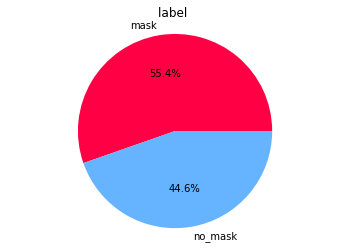

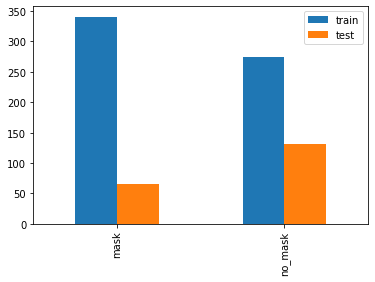

In [29]:
_, train_count = np.unique(train_labels, return_counts=True)
_, test_count = np.unique(test_labels, return_counts=True)

colors = ['#ff0044','#66b3ff']

plt.pie(train_count,
        explode=(0, 0) , 
        labels=class_names,
        colors=colors,
        autopct='%1.1f%%')
plt.rcParams.update({'text.color' : "black",
                     'axes.labelcolor' : "black"})
plt.axis('equal')
plt.title('label ')
plt.show()


pd.DataFrame({'train': train_count,
             'test': test_count},
             index=class_names).plot.bar()
plt.show()

In [36]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)


In [39]:
def examples(class_names, images, labels):

    plt.rcParams.update({'text.color' : "black",
                     'axes.labelcolor' : "black"})
    fig = plt.figure(figsize=(10,10))
    for i in range(10):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

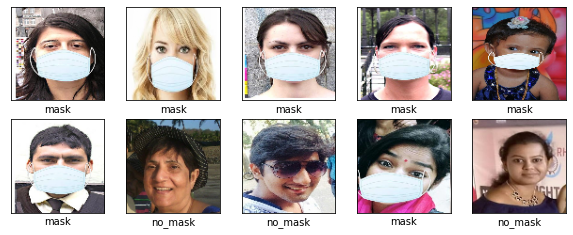

In [40]:
examples(class_names, train_images, train_labels)